In [3]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import svm
import pickle

In [4]:
pickle_in = open("Xt.pickle","rb")
Xt = pickle.load(pickle_in)
pickle_in.close()

pickle_in = open("yt.pickle","rb")
yt = pickle.load(pickle_in)
pickle_in.close()

In [4]:
param_grid = [{'C': [0.5, 1, 10, 100],  'gamma': ['scale', 1, 0.1, 0.01],  'kernel': ['sigmoid', 'rbf', 'poly']}]
optimal_params = GridSearchCV(svm.SVC(), param_grid, scoring='accuracy', verbose=2)
optimal_params.fit(Xt[:100, :], yt[:100])
print(optimal_params.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .................C=0.5, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.5, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.5, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.5, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.5, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.5, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.5, gamma=scale

In [5]:
X_train, X_test, y_train, y_test = train_test_split(Xt, yt, test_size=0.25 ,random_state=10)
print(len(X_train))
print(len(X_test))
#print(X_train, X_test, y_train, y_test)

10972
3658


In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
from sklearn.model_selection import cross_val_score

clf = svm.SVC(kernel='rbf',C=10,probability=True) # Linear Kernel
#Train the model using the training sets

#Import scikit-learn metrics module for accuracy calculation

In [ ]:
clf.fit(X_train[:5000, :], y_train[:5000])

#Predict the response for test dataset
y_pred = clf.predict(X_test[:1000, :])

In [8]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test[:1000], y_pred)

C:\Users\abdal\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


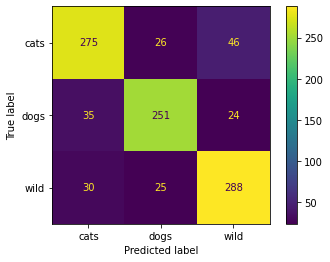

In [60]:
from sklearn.metrics import plot_confusion_matrix,roc_curve
plot_confusion_matrix(clf, X_test[:1000, :], y_test[:1000], values_format = 'd', display_labels=['cats', 'dogs', 'wild'])

In [10]:
from sklearn import metrics


# Model Accuracy: how often is the classifier correct?
print("Accuracy:",accuracy)

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test[:1000], y_pred, average=None))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test[:1000], y_pred,average=None))


Accuracy: 0.814
Precision: [0.80882353 0.83112583 0.80446927]
Recall: [0.7925072  0.80967742 0.83965015]


In [28]:
import sklearn
sklearn.__version__

'1.0.1'

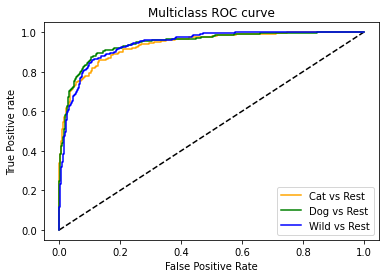

In [61]:
from sklearn.metrics import roc_auc_score ,auc ,roc_curve
import matplotlib.pyplot as plt
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3
y_score = clf.predict_proba(X_test[:1000,:])
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test[:1000], y_score[:,i], pos_label=i)
    
# plotting    
plt.plot(np.array([0,1]),linestyle='--',color='black')
plt.plot(fpr[0], tpr[0], linestyle='-',color='orange', label='Cat vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='-',color='green', label='Dog vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='-',color='blue', label='Wild vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
  

In [8]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes ,train_scores ,test_scores =learning_curve(clf, Xt[:800,:], yt[:8   00], cv=10, scoring='accuracy'
 ,n_jobs=-1 ,train_sizes=np.linspace(0.01,1,30) ,verbose=1)

train_mean =np.mean(train_scores , axis=1)
train_mean

train_std =np.mean(train_scores , axis=1)   
train_std

test_mean =np.mean(test_scores , axis=1)
test_mean

test_std =np.mean(test_scores , axis=1)
test_std

plt.plot(train_sizes , train_mean ,label='training score')
plt.plot(train_sizes , test_mean ,label='test score')

plt.fill_between(train_sizes-train_std , train_mean+train_std ,color='#ffffff' )
plt.fill_between(train_sizes-test_std , test_mean+test_std ,color='#ffffff' )

plt.title('learning curve')
plt.xlabel('training size')
plt.ylabel('accuracy score')
plt.legend(loc = 'best')


[learning_curve] Training set sizes: [  7  31  56  80 105 130 154 179 203 228 252 277 302 326 351 375 400 425
 449 474 498 523 547 572 597 621 646 670 695 720]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  9.7min finished


NameError: name 'plt' is not defined

In [47]:
scores = cross_val_score(clf, Xt[:1000,:], yt[:1000], cv=10, scoring='accuracy') 
print(scores)

[0.74 0.72 0.71 0.74 0.75 0.78 0.72 0.72 0.71 0.89]


In [48]:
print(scores.mean())

0.748
